In [2]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score,\
v_measure_score, homogeneity_score, completeness_score
from sklearn import datasets
import csv

import numpy as np

%load_ext autoreload
%autoreload 2

In [7]:
with open('../data/mushrooms.csv', 'r') as f:
    reader = csv.reader(f)
    mushrooms_dataset = list(reader)

del mushrooms_dataset[0]
    
mushrooms_dataset_labels = np.array([sublist[0] for sublist in mushrooms_dataset])
mushrooms_dataset = np.array([sublist[1:] for sublist in mushrooms_dataset])

#ClusterUtils.visualize_sample_data(wine_quality_dataset)
X = mushrooms_dataset
y_true = mushrooms_dataset_labels
print(mushrooms_dataset.shape)
print(mushrooms_dataset[:5])

(8124, 22)
[['x' 's' 'n' 't' 'p' 'f' 'c' 'n' 'k' 'e' 'e' 's' 's' 'w' 'w' 'p' 'w' 'o'
  'p' 'k' 's' 'u']
 ['x' 's' 'y' 't' 'a' 'f' 'c' 'b' 'k' 'e' 'c' 's' 's' 'w' 'w' 'p' 'w' 'o'
  'p' 'n' 'n' 'g']
 ['b' 's' 'w' 't' 'l' 'f' 'c' 'b' 'n' 'e' 'c' 's' 's' 'w' 'w' 'p' 'w' 'o'
  'p' 'n' 'n' 'm']
 ['x' 'y' 'w' 't' 'p' 'f' 'c' 'n' 'n' 'e' 'e' 's' 's' 'w' 'w' 'p' 'w' 'o'
  'p' 'k' 's' 'u']
 ['x' 's' 'g' 'f' 'n' 'f' 'w' 'b' 'k' 't' 'e' 's' 's' 'w' 'w' 'p' 'w' 'o'
  'e' 'n' 'a' 'g']]


### Test with Parallel Runs : Using silhouette_score as Evaluator

In [8]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, cluster_alg_ls=['GaussianMixture'], 
                                       dim_reduction_alg_ls=['TSNE'],
                                       n_evaluations=50, seed=27, run_obj='quality', cutoff_time=10, 
                                       shared_model=True, n_parallel_runs = 3,
                                       evaluator=lambda X, y_pred: float('inf') if len(set(y_pred)) == 1 \
                                                else -1 * silhouette_score(X, y_pred)  
#                                                    else davies_bouldin_score(X, y_pred)
                                      )

ValueError: could not convert string to float: 'x'

In [27]:
opt_result

Configuration:
  clustering_choice, Value: 'GaussianMixture'
  covariance_type___GaussianMixture, Value: 'full'
  dim_reduction_choice, Value: 'TSNE'
  early_exaggeration___TSNE, Value: 12.0
  init_params___GaussianMixture, Value: 'kmeans'
  n_components___GaussianMixture, Value: 5
  n_components___TSNE, Value: 2
  perplexity___TSNE, Value: 30.0
  random_state___GaussianMixture, Value: 0
  random_state___TSNE, Value: 0
  warm_start___GaussianMixture, Value: False

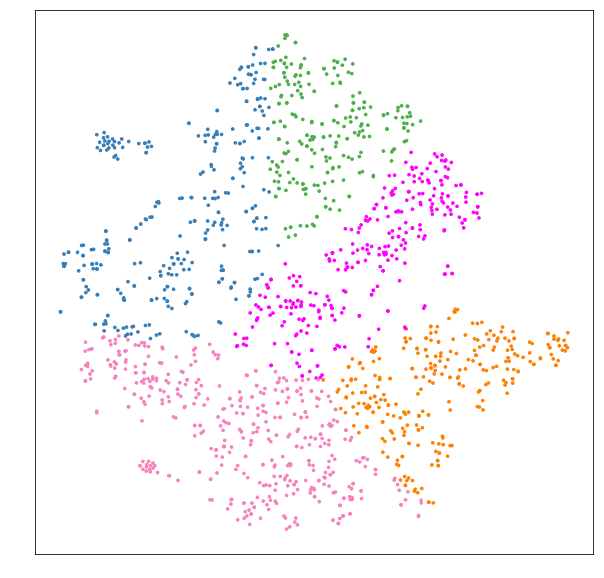

array([0, 1, 2, 3, 4])

In [28]:
predictions = autocluster.predict(X)
np.unique(predictions)

In [29]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   dim_reduction_choice, Value: 'TSNE'
   early_exaggeration___TSNE, Value: 12.0
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   n_components___TSNE, Value: 2
   perplexity___TSNE, Value: 30.0
   random_state___GaussianMixture, Value: 0
   random_state___TSNE, Value: 0
   warm_start___GaussianMixture, Value: False
 , ta_runs=0, ta_time_used=0, wallclock_time=0.0003902912139892578),
 TrajEntry(train_perf=2147483647.0, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   dim_reduction_choice, Value: 'TSNE'
   early_exaggeration___TSNE, Value: 12.0
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   n_components___TSNE, Value: 2
   perpl

In [30]:
print(predictions[:100])

[4 4 4 0 4 4 4 1 4 0 4 0 1 0 0 0 3 0 4 0 0 3 0 4 3 3 4 0 4 4 4 1 4 0 3 4 1
 2 4 0 0 4 0 0 4 1 4 2 3 3 4 4 4 0 4 4 0 0 3 3 3 4 4 4 1 1 4 1 3 3 4 4 4 4
 0 2 2 1 4 0 4 0 3 0 3 1 0 4 0 4 4 0 0 4 1 1 1 4 4 4]


In [31]:
print(y_true[:100])

[5 5 5 6 5 5 5 7 7 5 5 5 5 5 5 5 7 5 4 6 6 5 5 5 6 5 5 5 5 6 5 6 5 6 5 6 6
 7 4 5 5 4 6 5 5 4 5 5 5 5 5 6 6 5 6 5 5 5 5 6 5 5 7 5 5 5 5 5 5 6 6 5 5 4
 5 5 5 6 5 4 5 5 5 5 6 5 6 5 5 5 5 6 5 5 4 6 5 5 5 6]


- v_measure = (1 + beta) * homogeneity * completeness
                / (beta * homogeneity + completeness)
  when beta = 1(default), v_measure = the harmonic mean

In [32]:
print(v_measure_score(labels_true=y_true, labels_pred=predictions))
print(homogeneity_score(labels_true=y_true, labels_pred=predictions))
print(completeness_score(labels_true=y_true, labels_pred=predictions))

0.0758696960773982
0.08877144808319218
0.06624226227292619


###   

### Test with Parallel Runs : Using v_measure_score as Evaluator(only for test)

In [33]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, cluster_alg_ls=['GaussianMixture'], 
                                       dim_reduction_alg_ls=['TSNE'],
                                       n_evaluations=50, seed=27, run_obj='quality', cutoff_time=10, 
                                       shared_model=True, n_parallel_runs = 3,
                                       evaluator=lambda X, y_pred: float('inf') if len(set(y_pred)) == 1 \
                                                #else -1 * silhouette_score(X, y_pred)  
#                                                    else davies_bouldin_score(X, y_pred)
                                               else -1 * v_measure_score(labels_true=y_true, \
                                                                    labels_pred=y_pred)
                                      )

Configuration space object:
  Hyperparameters:
    clustering_choice, Type: Categorical, Choices: {GaussianMixture}, Default: GaussianMixture
    covariance_type___GaussianMixture, Type: Categorical, Choices: {full, tied, diag, spherical}, Default: full
    dim_reduction_choice, Type: Categorical, Choices: {TSNE}, Default: TSNE
    early_exaggeration___TSNE, Type: UniformFloat, Range: [5.0, 20.0], Default: 12.0
    init_params___GaussianMixture, Type: Categorical, Choices: {kmeans, random}, Default: kmeans
    n_components___GaussianMixture, Type: UniformInteger, Range: [1, 30], Default: 5
    n_components___TSNE, Type: Ordinal, Sequence: {2, 3}, Default: 2
    perplexity___TSNE, Type: UniformFloat, Range: [1.0, 300.0], Default: 30.0
    random_state___GaussianMixture, Type: UniformInteger, Range: [0, 9], Default: 0
    random_state___TSNE, Type: Ordinal, Sequence: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, Default: 0
    warm_start___GaussianMixture, Type: Categorical, Choices: {True, False}, De

In [34]:
opt_result

Configuration:
  clustering_choice, Value: 'GaussianMixture'
  covariance_type___GaussianMixture, Value: 'full'
  dim_reduction_choice, Value: 'TSNE'
  early_exaggeration___TSNE, Value: 12.0
  init_params___GaussianMixture, Value: 'kmeans'
  n_components___GaussianMixture, Value: 5
  n_components___TSNE, Value: 2
  perplexity___TSNE, Value: 30.0
  random_state___GaussianMixture, Value: 0
  random_state___TSNE, Value: 0
  warm_start___GaussianMixture, Value: False

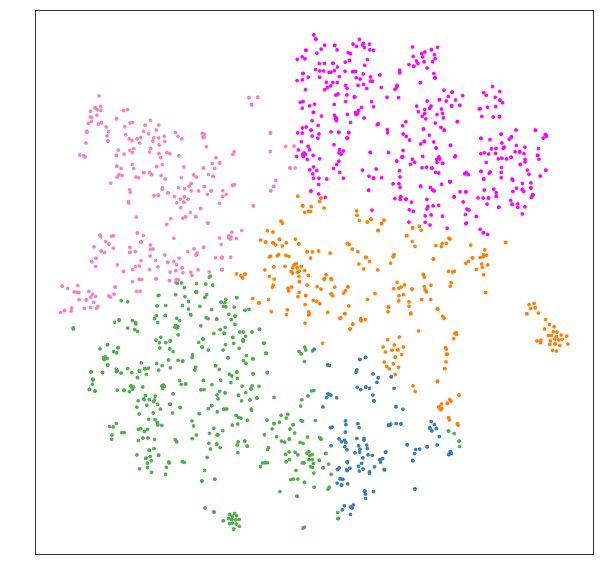

array([0, 1, 2, 3, 4])

In [35]:
predictions = autocluster.predict(X)
np.unique(predictions)

In [36]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   dim_reduction_choice, Value: 'TSNE'
   early_exaggeration___TSNE, Value: 12.0
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   n_components___TSNE, Value: 2
   perplexity___TSNE, Value: 30.0
   random_state___GaussianMixture, Value: 0
   random_state___TSNE, Value: 0
   warm_start___GaussianMixture, Value: False
 , ta_runs=0, ta_time_used=0, wallclock_time=0.00033473968505859375),
 TrajEntry(train_perf=2147483647.0, incumbent_id=1, incumbent=Configuration:
   clustering_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   dim_reduction_choice, Value: 'TSNE'
   early_exaggeration___TSNE, Value: 12.0
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   n_components___TSNE, Value: 2
   perp

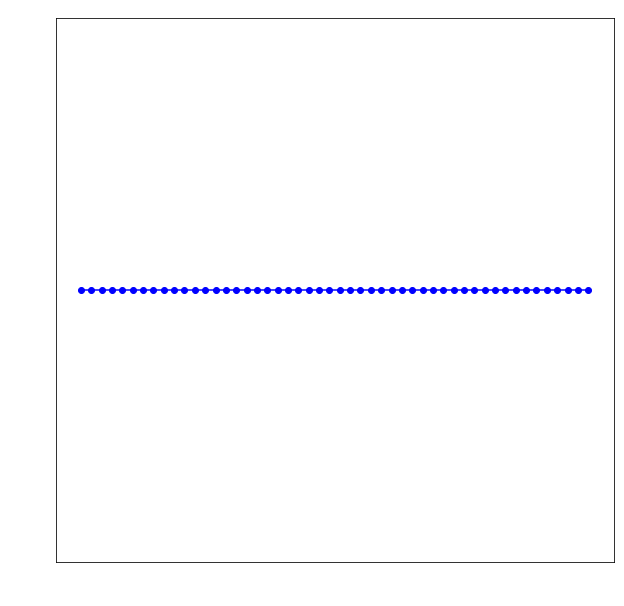

In [37]:
autocluster.plot_convergence()

In [38]:
print(predictions[:100])

[2 2 2 1 2 2 2 2 2 1 2 1 4 1 0 0 3 1 2 1 1 1 1 2 1 2 2 1 2 2 2 4 2 0 1 2 4
 3 2 1 1 2 1 1 2 4 0 3 2 1 2 2 2 0 0 2 3 0 2 2 1 0 2 2 4 4 2 4 3 4 2 2 2 2
 1 3 3 4 2 1 2 1 1 1 3 4 1 2 1 2 0 1 1 2 4 4 4 2 2 2]


In [39]:
print(y_true[:100])

[5 5 5 6 5 5 5 7 7 5 5 5 5 5 5 5 7 5 4 6 6 5 5 5 6 5 5 5 5 6 5 6 5 6 5 6 6
 7 4 5 5 4 6 5 5 4 5 5 5 5 5 6 6 5 6 5 5 5 5 6 5 5 7 5 5 5 5 5 5 6 6 5 5 4
 5 5 5 6 5 4 5 5 5 5 6 5 6 5 5 5 5 6 5 5 4 6 5 5 5 6]


In [40]:
print(v_measure_score(labels_true=y_true, labels_pred=predictions))
print(homogeneity_score(labels_true=y_true, labels_pred=predictions))
print(completeness_score(labels_true=y_true, labels_pred=predictions))

0.10585969082051996
0.12165954301252023
0.09369197055980943
